In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

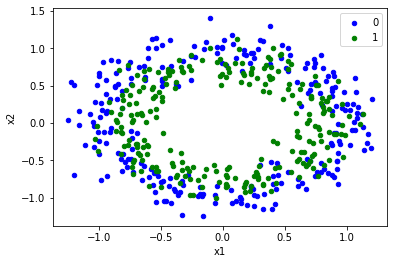

In [11]:
X,y = make_circles(n_samples = 500, noise = 0.13, random_state=42)
df  = pd.DataFrame(dict(x1 = X[:,0], x2 = X[:,1], y = y))

#plot the dataset
colors = {0:'blue', 1: 'green'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax = ax , kind = 'scatter', x = 'x1', y = 'x2', label = key, color = colors[key])
plt.show()

In [37]:
class SVM:

    def __init__(self, err=1.0, kernel=None):
        self.err = err
        self.w = 0
        self.b = 0
        self.kernel = kernel

    def hingeloss(self, w, b, x, y):
        reg = 0.5 *(w * w)

        for i in range(x.shape[0]):
            #optimization term
            opt_term = y[i] * ((np.dot(w, x[i]))+b)

            loss = reg + self.err * max(0, 1-opt_term)
        
        return loss[0][0]

    def transform_poly(self,X, Y = None):
        X['x1^2'] = X['x1'] **2
        X['x2^2'] = X['x2'] ** 2

        X['x1*x2'] = X['x1'] * X['x2']

        X = X.to_numpy()
        if Y.size != 0:
            Y = Y.to_numpy()
            return X, Y
        else:
            return X

    def fit(self, X, y, batch_size = 100, learning_rate = 0.001, epochs = 1000):
        number_of_features = X.shape[1]
        number_of_samples = X.shape[0]
        err = self.err
        ids = np.arange(number_of_samples)
        np.random.shuffle(ids)

        #
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        if(self.kernel == "poly"):
            print("SVM(kernel=='poly')")
            X, y = self.transform_poly(X, y)
        else:
            X = X.to_numpy()
            y = y.to_numpy()

        #gradient descent logic
        for i in range(epochs):
            l = self.hingeloss(w,b,X,y)
            losses.append(l)

            #starting from the very first to the number of samples with batch_size as the interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+batch_size):

                    if j < number_of_samples:
                        x = ids[j]
                        ti = y[x] * (np.dot(w, X[x].T) + b)

                        #do nothing
                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        
                        else:
                            gradw += err*y[x] * X[x]

                            gradb += err*y[x]

                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb

        self.w += w
        self.b += b

        return self.w, self.b , losses

    def predict(self, X):
        if(self.kernel == 'poly'):
            X = self.transform_poly(X,np.array([]))
        else:
            X = X.to_numpy()
        prediction = np.dot(X,self.w[0]) + self.b
        return np.sign(prediction)



## Classification

In [33]:
X = df[['x1', 'x2']]
y = df['y']

y = y.replace(0,-1)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state=42)


In [29]:
from sklearn.metrics import accuracy_score
svm = SVM()

w,b, losses = svm.fit(X_train, y_train)

pred = svm.predict(X_test)

print("Accuracy: ", accuracy_score(pred,y_test))

Accuracy:  0.48


In [38]:
svm_poly = SVM(kernel = 'poly')

w,b, losses = svm_poly.fit(X_train, y_train)

pred = svm_poly.predict(X_test)

print("Accuracy: ", accuracy_score(pred,y_test))

SVM(kernel=='poly')
Accuracy:  0.7657142857142857
